CART (Classification and Regression Trees)

In [1]:
import pandas as pd
from faker import Faker
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\3735025\AppData\Local\Temp\ipykernel_63348\4178386346.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

def generate_synthetic_data(data_size=50):
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 1, 10)

    # Generate random timestamps for every 5 minutes within the date range
    timestamps = pd.date_range(start=start_date, end=end_date, freq='5min')[:data_size]


    data = {
        'Timestamp': timestamps,
        'Number of Flights': np.random.randint(1, 10, size=data_size),
        'Weather Conditions': np.random.choice(["Clear", "Cloudy", "Rainy", "Snowy"], size=data_size),
        'Traffic Conditions': np.random.choice(["Light", "Moderate", "Heavy"], size=data_size),
        'Distance between Pick-up and Drop-off': np.random.uniform(1, 20, size=data_size),
        'Number of Passengers': np.random.randint(1, 6, size=data_size),
        'ETR Prediction': np.random.uniform(5, 60, size=data_size),
        'Wait Time Class': np.random.choice([0, 1], size=data_size)  # 0: Short Wait, 1: Long Wait
    }

    df = pd.DataFrame(data)
    return df




In [3]:
# Generate synthetic data
df = generate_synthetic_data()

# Extract relevant information from the timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Drop columns that won't be used as features
df = df.drop(['Timestamp', 'Wait Time Class'], axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Weather Conditions', 'Traffic Conditions'])

# Define features (X) and target variable (y)
X = df
y = generate_synthetic_data()['Wait Time Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


NameError: name 'classification_report' is not defined

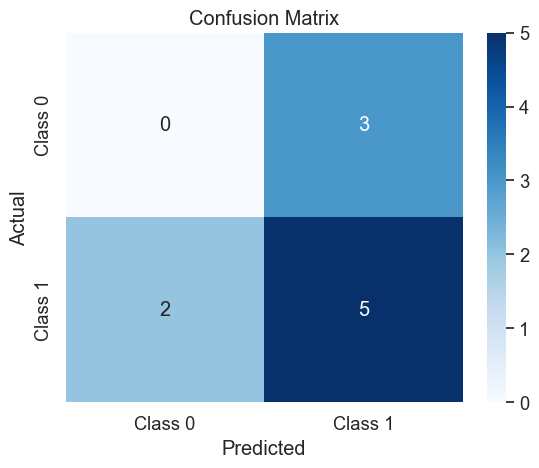

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Make predictions on the test set
y_pred = cart_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

